# 🧠 Práctica final NLP

## 📊 Análisis de Sentimiento - Etapa de preprocesado de texto

### 🛒 Dataset: Reviews de Amazon

Este dataset contiene reseñas de productos de Amazon clasificadas por categorías, en este caso, **Deportes y actividades al aire libre**.  
Cada reseña incluye una calificación representada por un **número de estrellas ⭐**.


# 1. Cargar el dataset balanceado

In [ ]:
import pandas as pd
import numpy as np
import spacy
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar modelo SpaCy
nlp = spacy.load("en_core_web_sm")

# Cargar el dataset balanceado
reviews_df = pd.read_csv('/content/balanced_dataset.csv')

# Verificar que el dataset se haya cargado correctamente
print("Dataset cargado exitosamente")
print(f"Dimensiones: {reviews_df.shape}")
print(f"Columnas: {reviews_df.columns.tolist()}")

Dataset cargado exitosamente
Dimensiones: (10000, 10)
Columnas: ['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime', 'sentiment']


In [ ]:
# Mostrar ejemplos de reviews originales
print("\nEjemplos de reviews originales:")
print("-" * 50)
for i, review in enumerate(reviews_df['reviewText'].head(3)):
    print(f"Review {i+1}:")
    print(review[:200])  # Mostrar solo los primeros 200 caracteres
    print("-" * 50)


Ejemplos de reviews originales:
--------------------------------------------------
Review 1:
This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy
--------------------------------------------------
Review 2:
I had a factory Glock tool that I was using for my Glock 26, 27, and 17.  I've since lost it and had needed another.  Since I've used Ghost products prior, and know that they are reliable, I had decid
--------------------------------------------------
Review 3:
If you don't have a 3/32 punch or would like to have one in your Glock bag, this is okay.  The butt end of it is handy for pushing pins back in place.  If you already have a 3/32 punch and don't need 
--------------------------------------------------


# 2. Cargar funciones auxiliares para el preprocesamiento

In [ ]:
# Función auxiliar para eliminar URLs
def remove_urls(text):
    """Elimina URLs del texto"""
    url_pattern = r'http\S+|www\S+|https\S+'
    return re.sub(url_pattern, '', text)

In [ ]:
# Función auxiliar para eliminar caracteres especiales
def remove_special_chars(text):
    """Elimina caracteres especiales, números y espacios múltiples"""
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Eliminar espacios múltiples
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# 3. Funciones de preprocesados

In [ ]:
# Función principal de preprocesado
def preprocess_text(text):
    # Validar input
    if pd.isna(text) or text is None:
        return 'no_content'

    text = str(text).strip()
    if text == '':
        return 'no_content'

    # Convertir a minúsculas
    text = text.lower()

    # Eliminar URLs
    text = remove_urls(text)

    # Eliminar caracteres especiales y números
    text = remove_special_chars(text)

    # Procesar con SpaCy
    doc = nlp(text)

    # Filtrar y lematizar tokens
    processed_tokens = []
    for token in doc:
        # Filtrar stopwords, puntuación, espacios, y tokens muy cortos
        if not token.is_stop and not token.is_punct and not token.is_space and len(token.text) > 2:
            # Lematizar
            processed_tokens.append(token.lemma_)

    # Unir tokens procesados
    processed_text = ' '.join(processed_tokens)

    # Validar output - asegurar que nunca devuelve cadena vacía
    if not processed_text.strip():
        return 'no_content'

    return processed_text

In [ ]:
# Función avanzada de preprocesado con más filtros
def advanced_preprocess_text(text):
    # Validar input
    if pd.isna(text) or text is None:
        return 'no_content'

    text = str(text).strip()
    if text == '':
        return 'no_content'

    # Convertir a minúsculas
    text = text.lower()

    # Eliminar URLs
    text = remove_urls(text)

    # Eliminar caracteres especiales y números
    text = remove_special_chars(text)

    # Procesar con SpaCy
    doc = nlp(text)

    processed_tokens = []
    for token in doc:
        # Más condiciones de filtrado
        if (not token.is_stop and
            not token.is_punct and
            not token.is_space and
            len(token.text) > 2 and
            token.pos_ not in ['PRON', 'DET', 'ADP'] and  # Filtrar pronombres, determinantes, preposiciones
            len(token.text) < 20 and  # Ignorar palabras muy largas
            token.is_alpha):  # Solo palabras alfabéticas

            # Lematizar
            processed_tokens.append(token.lemma_)

    processed_text = ' '.join(processed_tokens)

    # Validar output - asegurar que nunca devuelve cadena vacía
    if not processed_text.strip():
        return 'no_content'

    return processed_text

# 4. Validar textos nulos o vacíos

In [ ]:
# Verificar textos nulos o vacíos en el dataset original
null_count = reviews_df['reviewText'].isna().sum()
empty_count = reviews_df['reviewText'].apply(lambda x: str(x).strip() == '' if pd.notna(x) else True).sum()

print(f"\nTextos nulos en el dataset original: {null_count}")
print(f"Textos vacíos en el dataset original: {empty_count}")


Textos nulos en el dataset original: 11
Textos vacíos en el dataset original: 11


# 5. Aplicar el preprocesado a todo el dataset


In [ ]:
print("\nAplicando preprocesado a todo el dataset...")
reviews_df['processed_text'] = reviews_df['reviewText'].apply(preprocess_text)
reviews_df['processed_text_advanced'] = reviews_df['reviewText'].apply(advanced_preprocess_text)


Aplicando preprocesado a todo el dataset...


In [ ]:
# Verificar que no hay valores nulos en el resultado
print("\nVerificación de resultados:")
print(f"Valores nulos en processed_text: {reviews_df['processed_text'].isna().sum()}")
print(f"Valores nulos en processed_text_advanced: {reviews_df['processed_text_advanced'].isna().sum()}")
print(f"Cadenas 'no_content' generadas: {(reviews_df['processed_text_advanced'] == 'no_content').sum()}")


Verificación de resultados:
Valores nulos en processed_text: 0
Valores nulos en processed_text_advanced: 0
Cadenas 'no_content' generadas: 11


# 6. Análisis comparativo del preprocesado

In [ ]:
print("\nAnálisis del preprocesado:")
print("-"*30)
original_length = reviews_df['reviewText'].str.len().mean()
basic_length = reviews_df['processed_text'].str.len().mean()
advanced_length = reviews_df['processed_text_advanced'].str.len().mean()

print(f"Longitud promedio del texto original: {original_length:.2f} caracteres")
print(f"Longitud promedio del texto preprocesado (básico): {basic_length:.2f} caracteres")
print(f"Longitud promedio del texto preprocesado (avanzado): {advanced_length:.2f} caracteres")
print(f"Reducción básica: {((original_length - basic_length) / original_length * 100):.1f}%")
print(f"Reducción avanzada: {((original_length - advanced_length) / original_length * 100):.1f}%")


Análisis del preprocesado:
------------------------------
Longitud promedio del texto original: 458.29 caracteres
Longitud promedio del texto preprocesado (básico): 226.42 caracteres
Longitud promedio del texto preprocesado (avanzado): 224.05 caracteres
Reducción básica: 50.6%
Reducción avanzada: 51.1%


<ipython-input-12-ecd08f77483c>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=45, ha='right')


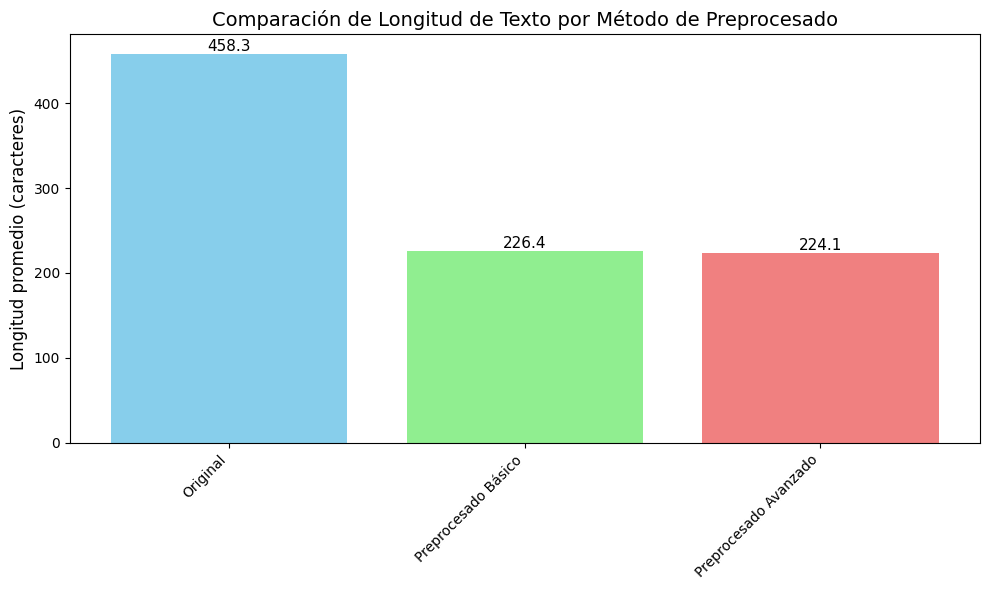

In [ ]:
# Visualizar la reducción de texto
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
methods = ['Original', 'Preprocesado Básico', 'Preprocesado Avanzado']
lengths = [original_length, basic_length, advanced_length]
colors = ['skyblue', 'lightgreen', 'lightcoral']

bars = ax.bar(methods, lengths, color=colors)
ax.set_title('Comparación de Longitud de Texto por Método de Preprocesado', fontsize=14)
ax.set_ylabel('Longitud promedio (caracteres)', fontsize=12)
ax.set_xticklabels(methods, rotation=45, ha='right')

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}',
            ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

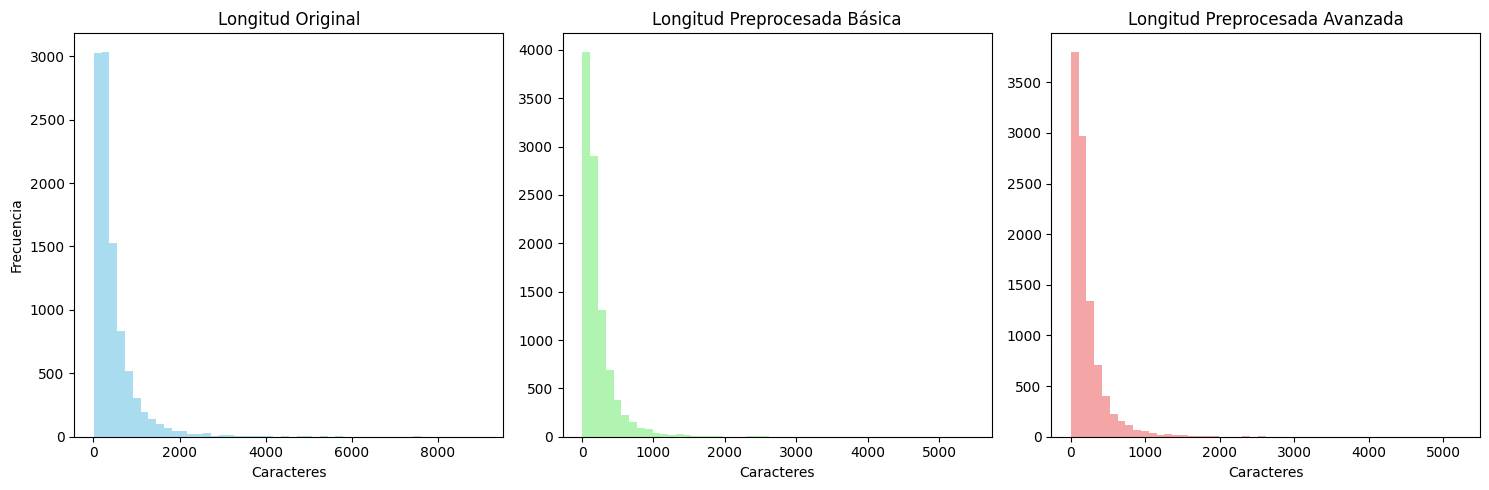

In [ ]:
# Analizar distribución de longitudes de texto
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histograma de longitud original
axes[0].hist(reviews_df['reviewText'].str.len(), bins=50, color='skyblue', alpha=0.7)
axes[0].set_title('Longitud Original', fontsize=12)
axes[0].set_xlabel('Caracteres')
axes[0].set_ylabel('Frecuencia')

# Histograma de longitud preprocesada básica
axes[1].hist(reviews_df['processed_text'].str.len(), bins=50, color='lightgreen', alpha=0.7)
axes[1].set_title('Longitud Preprocesada Básica', fontsize=12)
axes[1].set_xlabel('Caracteres')

# Histograma de longitud preprocesada avanzada
axes[2].hist(reviews_df['processed_text_advanced'].str.len(), bins=50, color='lightcoral', alpha=0.7)
axes[2].set_title('Longitud Preprocesada Avanzada', fontsize=12)
axes[2].set_xlabel('Caracteres')

plt.tight_layout()
plt.show()

In [ ]:
# Guardar el dataset preprocesado
reviews_df.to_csv('/content/preprocessed_dataset.csv', index=False)
print("\nDataset con texto preprocesado guardado en 'preprocessed_dataset.csv'")


Dataset con texto preprocesado guardado en 'preprocessed_dataset.csv'


In [ ]:
# Descargar el dataset preprocesado
from google.colab import files
files.download('/content/preprocessed_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>